# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
mouse_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = mouse_results["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas
dupe_mouse = mouse_results[mouse_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dupe_mouse["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dupe_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results = mouse_results.loc[mouse_results["Mouse ID"]!="g989"]
clean_mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_results["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_tumor = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd_tumor = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_summary = pd.DataFrame({
"Mean Tumor Volume": mean_tumor,
"Median Tumor Volume": med_tumor,
"Tumor Volume Variance": var_tumor,
"Tumor Volume Std. Dev.": sd_tumor,
"Tumor Volume Std. Err.": sem_tumor

})


tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#https://sparkbyexamples.com/pandas/pandas-groupby-sum-examples/ 

## Bar and Pie Charts

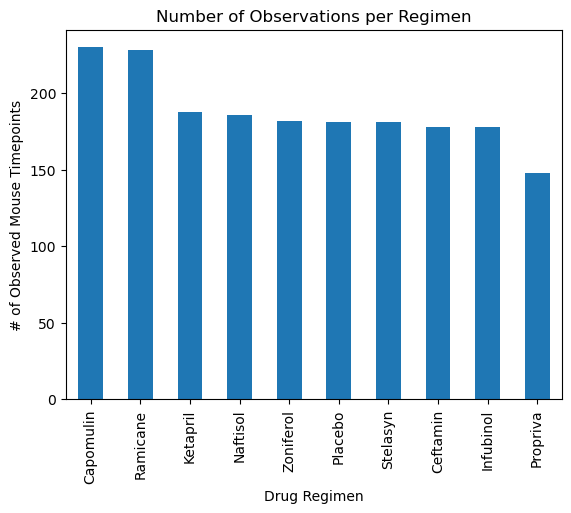

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_group = clean_mouse_results.groupby("Drug Regimen")
timepoint = drug_group["Timepoint"].count().sort_values(ascending=False)
timepoint.plot(kind="bar")


plt.title("Number of Observations per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

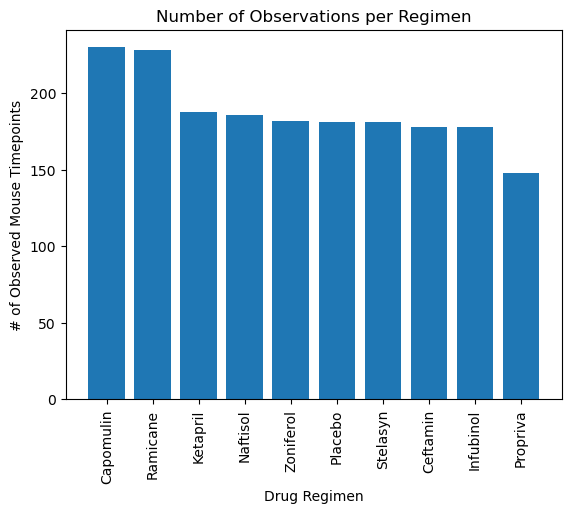

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create a bar chart based off of the group series from before

plt.bar(x=timepoint.index, height=timepoint.values)
plt.title("Number of Observations per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()


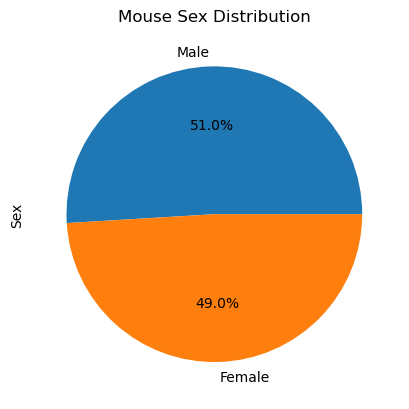

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_group = clean_mouse_results.groupby("Sex")
gender = gender_group["Sex"].count().sort_values(ascending=False)
gender.plot(kind="pie", autopct="%1.1f%%")
plt.title("Mouse Sex Distribution")
plt.show()

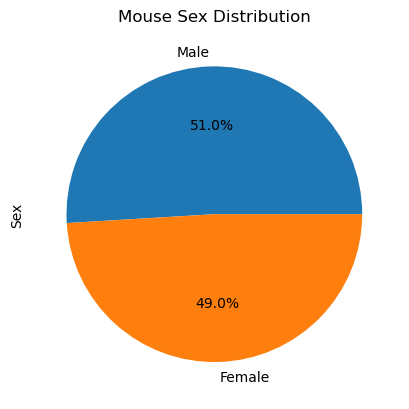

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender.values,labels=gender.index, autopct="%1.1f%%")
plt.title("Mouse Sex Distribution")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse, 
#https://www.statology.org/pandas-groupby-sum/ ; Additional [] around Timepoint makes list into dataframe
maxtimedf = clean_mouse_results.groupby("Mouse ID")[["Timepoint"]].max().reset_index()
maxtimedf

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#Merge left so we only keep information related to last row for each Mouse ID
mergedf = pd.merge(maxtimedf, clean_mouse_results, how ="left", on = ["Mouse ID", "Timepoint"] )
mergedf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors = mergedf.loc[mergedf["Drug Regimen"]==t]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(tumors)
    
    # Determine outliers using upper and lower bounds
    #https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe 
    q1 = tumors.quantile(0.25)
    q3 = tumors.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = tumors.loc[(tumors < fence_low) | (tumors > fence_high)]
    print(t,df_out)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


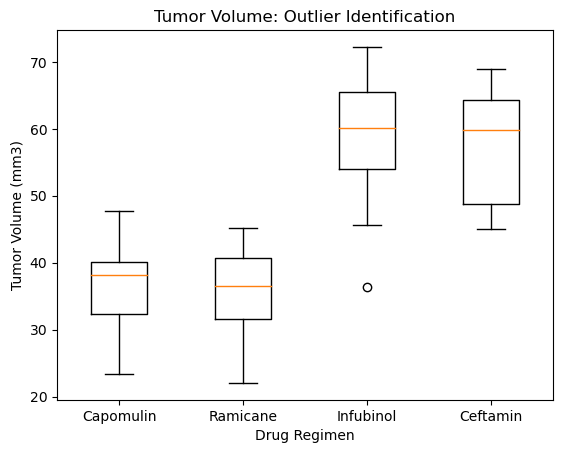

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels=treatments)
plt.title("Tumor Volume: Outlier Identification")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

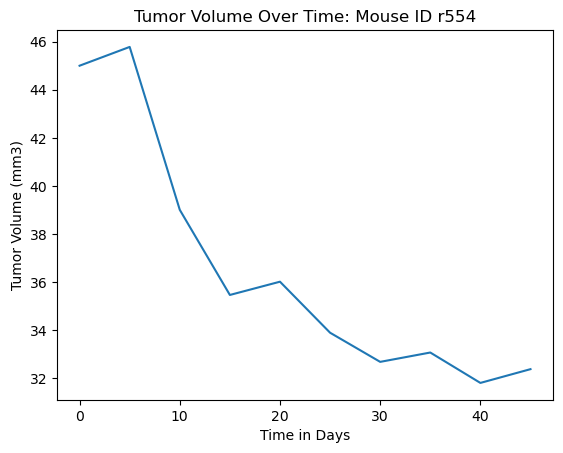

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_df = clean_mouse_results.loc[clean_mouse_results["Mouse ID"]  == "r554"]

plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.title("Tumor Volume Over Time: Mouse ID r554")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

C:\Users\kgndi\AppData\Local\Temp\ipykernel_25052\1732830898.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capo_df.drop("Drug Regimen", axis = 1, inplace = True)
C:\Users\kgndi\AppData\Local\Temp\ipykernel_25052\1732830898.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capo_df.drop("Sex", axis = 1, inplace = True)


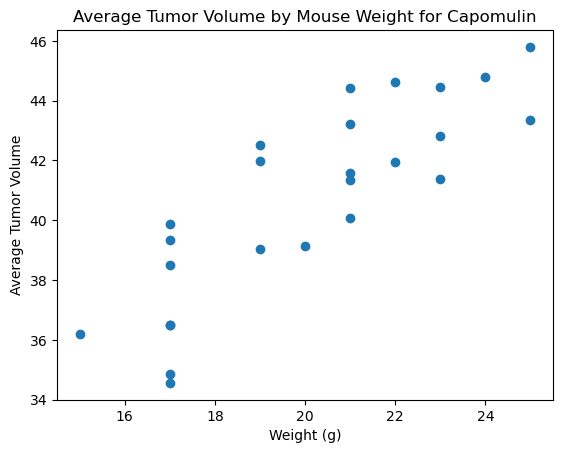

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter Capo from clean mouse 
capo_df = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == "Capomulin"]


#Drop drug regimen and sex because cannot conduct mean on string
capo_df.drop("Drug Regimen", axis = 1, inplace = True)
capo_df.drop("Sex", axis = 1, inplace = True)

#Use groupby on Mouse ID, take mean weight and mean tumor volume; We only have weight at one timepoint so taking mean weight has no impact
capo_df = capo_df.groupby(["Mouse ID"]).mean()

#Creating variables to plot 
x = capo_df["Weight (g)"]
y = capo_df["Tumor Volume (mm3)"]

plt.scatter(x , y )
plt.title("Average Tumor Volume by Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

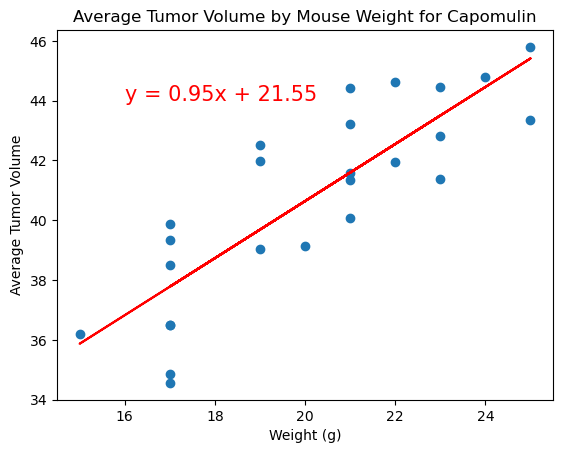

The correlation coefficient between weight and tumor volume is 0.84


In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x , y )
#Add regression line to plot
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(16, 44), fontsize=15,color="red")
plt.title("Average Tumor Volume by Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

#Correlation coefficient 
print(f"The correlation coefficient between weight and tumor volume is {round(st.pearsonr(x, y)[0],2)}")